<a href="https://colab.research.google.com/github/Dhruvin3103/ML/blob/main/Decision_Tree/car_seat_preprunnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/Dhruvin3103/ML/main/CSV/Carseats.csv")
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [48]:
X = df.iloc[:,:-2]
X["ShelveLoc"] =  LabelEncoder().fit_transform(df["ShelveLoc"])
X.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,9.50,138,73,11,276,120,0,42,17
1,11.22,111,48,16,260,83,1,65,10


In [49]:
# Y1 = df.iloc[:,9]
# Y1["Urban"] = LabelEncoder().fit_transform(df.iloc[:,9])
Y1 = pd.DataFrame(data = LabelEncoder().fit_transform(df.iloc[:,9]),columns=["Urban"])
Y1.head(2)

,Urban
0,1
1,1


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y1,test_size = 0.33,random_state=None)

In [51]:
X_train.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
340,7.5,140,29,0,105,91,0,43,16
391,6.1,153,63,0,49,124,0,56,16


In [52]:
Y_train.head(2)

,Urban
340,1
391,1


In [70]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [54]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [55]:
tree.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [56]:
tree.score(X_test,Y_test)

0.5454545454545454

[Text(0.23061079545454546, 0.96875, 'x[2] <= 24.5\ngini = 0.422\nsamples = 268\nvalue = [81, 187]'),
 Text(0.05909090909090909, 0.90625, 'x[7] <= 50.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.04090909090909091, 0.84375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07727272727272727, 0.84375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.40213068181818185, 0.90625, 'x[7] <= 31.5\ngini = 0.405\nsamples = 259\nvalue = [73, 186]'),
 Text(0.11363636363636363, 0.84375, 'x[1] <= 110.0\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.09545454545454546, 0.78125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.1318181818181818, 0.78125, 'x[7] <= 28.5\ngini = 0.488\nsamples = 26\nvalue = [11, 15]'),
 Text(0.09545454545454546, 0.71875, 'x[4] <= 460.0\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.07727272727272727, 0.65625, 'x[1] <= 131.5\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.05909090909090909, 0.59375, 'gini = 0.0\nsamples = 10\nvalue

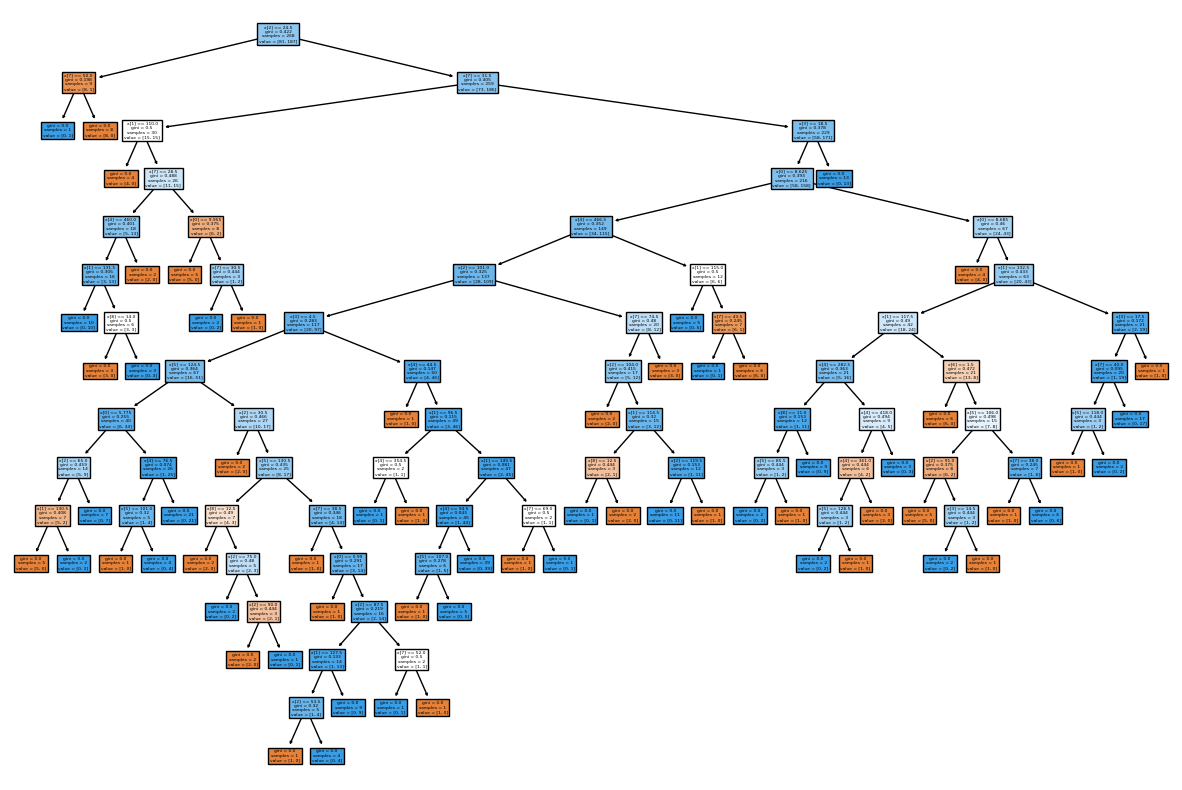

In [57]:
plt.figure(figsize=(15,10))
plot_tree(tree,filled=True)

### Using preprunnig technique

In [85]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [86]:
from sklearn.model_selection import GridSearchCV
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [87]:
cv.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [88]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [89]:
print(accuracy_score(cv.predict(X_test),Y_test))

0.6818181818181818
